# Introduction to neural network classification with TensorFlow

In this notebook we're ging to learn how to write neural networks for classification problems

A classification is where you try to classify something as one thing or another
* Binary classification
* Multiclass classification
* Multilabel classification


# Creating data to view and fit

In [ ]:
from sklearn.datasets import make_circles

# Make 1000 samples
n_samples=1000

# Create circles
X,y=make_circles(n_samples,
                 noise=0.03,
                 random_state=42)

In [ ]:
# Check out features
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [ ]:
# Check the labels
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

Our data is a little hard to understand right now. Let's visualize it

In [ ]:
import pandas as pd
circles=pd.DataFrame({"X0":X[:,0],"X1":X[:,1],"label":y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


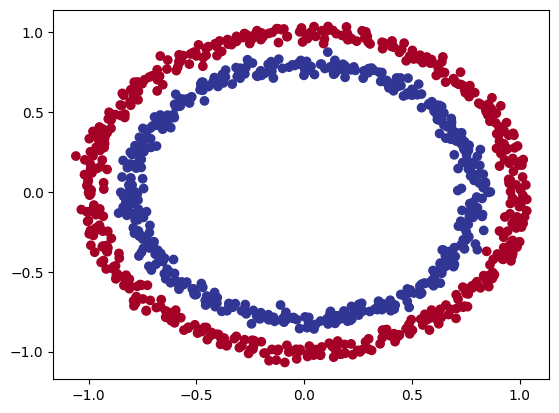

In [ ]:
# Visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.RdYlBu);

In [ ]:
# Check the shaped of pur features and labels
X.shape, y.shape


((1000, 2), (1000,))

In [ ]:
# How many samples we're working on
len(X), len(y)

(1000, 1000)

In [ ]:
# View the first example of features and labels
X[0],y[0]

(array([0.75424625, 0.23148074]), 1)

## Steps in modelling

The steps in modelling with TensorFlow are typically :
1. Create or import a model
2. Compile the model
3. Fit the model
4. Evaluate the model
5. Tweak
6. Evaluate...

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.13.0


In [ ]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_1=tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

# 3. Fit the model
model_1.fit(X,y,epochs=5)

Epoch 1/5
32/32 [==============================] - 1s 3ms/step - loss: 2.7203 - accuracy: 0.4760
Epoch 2/5
32/32 [==============================] - 0s 2ms/step - loss: 0.7426 - accuracy: 0.4920
Epoch 3/5
32/32 [==============================] - 0s 10ms/step - loss: 0.7087 - accuracy: 0.4940
Epoch 4/5
32/32 [==============================] - 0s 2ms/step - loss: 0.6988 - accuracy: 0.4910
Epoch 5/5
32/32 [==============================] - 0s 2ms/step - loss: 0.6956 - accuracy: 0.4930


In [ ]:
# Let's try and improve our model by training for longer...
model_1.fit(X,y,epochs=200,verbose=0)

In [ ]:
model_1.evaluate(X,y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934831142425537, 0.5]

Since we're working on a binary classification problem and our model is getting around ~50% accuracy...it's performing as if it's guessing.

So let's add an extra layer

In [ ]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_2=tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

# 3. Fit the model
model_2.fit(X,y,epochs=100,verbose=0)


In [ ]:
# 4. Evaluate the model
model_2.evaluate(X,y)

32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000


[7.712474346160889, 0.5]

# Improving our model

Let's look into our bag of tricks to see how we can improve our model.

1. Create a model - we might add more layers or increase the number of hidden units within a layer
2. Compiling a model - here we might choose a different optimmization function like Adam instead of SGD
3. Fitting a model - perhaps we might fit our model for more epochs (leave it training for longer)

In [ ]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model (this time with 3 layers)
model_3=tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# 3. Fit the model
model_3.fit(X,y,epochs=100)


Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 2.6202 - accuracy: 0.4560
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7162 - accuracy: 0.4960
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6964 - accuracy: 0.4960
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6979 - accuracy: 0.4830
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6965 - accuracy: 0.4770
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6969 - accuracy: 0.4560
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6964 - accuracy: 0.5010
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6958 - accuracy: 0.5210
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6990 - accuracy: 0.4930
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6950 - accuracy: 0.4750
Epoch 11/

In [ ]:
# 4. Evaluate the model
model_3.evaluate(X,y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6973 - accuracy: 0.5090


[0.6973181366920471, 0.5090000033378601]

In [ ]:
model_3.predict(X)

32/32 [==============================] - 0s 1ms/step


array([[0.4846158 ],
       [0.5589214 ],
       [0.56286657],
       [0.56435114],
       [0.45030648],
       [0.568042  ],
       [0.5497067 ],
       [0.4799877 ],
       [0.4864171 ],
       [0.5650036 ],
       [0.5219247 ],
       [0.5215209 ],
       [0.55632085],
       [0.46043825],
       [0.45595106],
       [0.4692391 ],
       [0.5460532 ],
       [0.4721972 ],
       [0.5507715 ],
       [0.5129163 ],
       [0.5009395 ],
       [0.58021766],
       [0.4697338 ],
       [0.48745546],
       [0.58037144],
       [0.5702983 ],
       [0.54211754],
       [0.46372083],
       [0.46564567],
       [0.4584699 ],
       [0.4889725 ],
       [0.56900996],
       [0.547687  ],
       [0.46191898],
       [0.4700565 ],
       [0.58443683],
       [0.5678788 ],
       [0.52194965],
       [0.46632537],
       [0.50338507],
       [0.50932145],
       [0.5363446 ],
       [0.5195865 ],
       [0.45941508],
       [0.5301146 ],
       [0.54440236],
       [0.4557387 ],
       [0.536

To visualize our model's prediction, let's create a function `plot_decision_boundary()`, this function will:

* Take in a trrained model, features (X) and labels (y)
* Create a meshgrid of the different values
* Make predictions across the meshgrid
* Plot the predictions as well as a line between different zones (where each unique class falls)

In [ ]:
import numpy as np

In [ ]:
def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.

  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))

  # Create X values (we're going to predict on all of these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together: https://numpy.org/devdocs/reference/generated/numpy.c_.html

  # Make predictions using the trained model
  y_pred = model.predict(x_in)

  # Check for multi-class
  if model.output_shape[-1] > 1: # checks the final dimension of the model's output shape, if this is > (greater than) 1, it's multi-class
    print("doing multiclass classification...")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classifcation...")
    y_pred = np.round(np.max(y_pred, axis=1)).reshape(xx.shape)

  # Plot decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:,0],X[:,1],c=y,s=40,cmap=plt.cm.RdYlBu);
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 0s 1ms/step
doing binary classifcation...


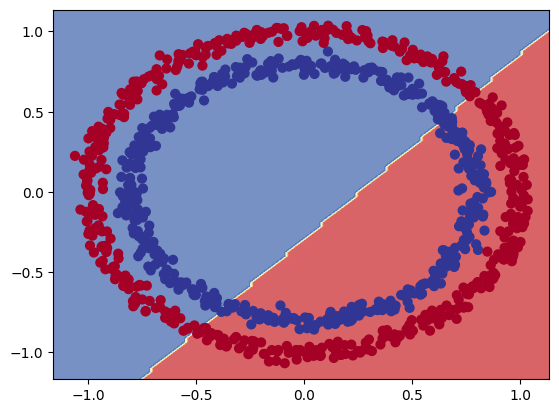

In [ ]:
# Check out the predictions our model is making
plot_decision_boundary(model=model_3,
                       X=X,
                       y=y)

It is making a linear bondary. So let's see if our model can be used for a regression problem..


In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create some regression data
X_regression=tf.range(0,1000,5)
y_regression=tf.range(100,1100,5) # y=X+100

# Split our regression data into training and test sets
X_reg_train=X_regression[:150]
X_reg_test=X_regression[150:]
y_reg_train=y_regression[:150]
y_reg_test=y_regression[150:]

# Fit our model to the regression data
model_3.fit(X_reg_train,y_reg_train,epochs=100)

Epoch 1/100


ValueError: ignored

We compiled our model for a binary classification problem.
But...we're working on a regression problem..so, we have to change the loss function

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create some regression data
X_regression=tf.range(0,1000,5)
y_regression=tf.range(100,1100,5) # y=X+100

# Split our regression data into training and test sets
X_reg_train=X_regression[:150]
X_reg_test=X_regression[150:]
y_reg_train=y_regression[:150]
y_reg_test=y_regression[150:]

# 1. Create the model (this time with 3 layers)
model_3=tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])

# 3. Fit the model
model_3.fit(tf.expand_dims(X_reg_train,axis=-1),y_reg_train,epochs=100)


Epoch 1/100
5/5 [==============================] - 1s 4ms/step - loss: 414.3679 - mae: 414.3679
Epoch 2/100
5/5 [==============================] - 0s 3ms/step - loss: 292.3753 - mae: 292.3753
Epoch 3/100
5/5 [==============================] - 0s 3ms/step - loss: 174.9401 - mae: 174.9401
Epoch 4/100
5/5 [==============================] - 0s 3ms/step - loss: 60.3695 - mae: 60.3695
Epoch 5/100
5/5 [==============================] - 0s 2ms/step - loss: 75.3185 - mae: 75.3185
Epoch 6/100
5/5 [==============================] - 0s 2ms/step - loss: 86.0313 - mae: 86.0313
Epoch 7/100
5/5 [==============================] - 0s 3ms/step - loss: 55.6889 - mae: 55.6889
Epoch 8/100
5/5 [==============================] - 0s 2ms/step - loss: 48.6630 - mae: 48.6630
Epoch 9/100
5/5 [==============================] - 0s 3ms/step - loss: 48.1781 - mae: 48.1781
Epoch 10/100
5/5 [==============================] - 0s 2ms/step - loss: 43.8146 - mae: 43.8146
Epoch 11/100
5/5 [==============================] - 0

2/2 [==============================] - 0s 5ms/step


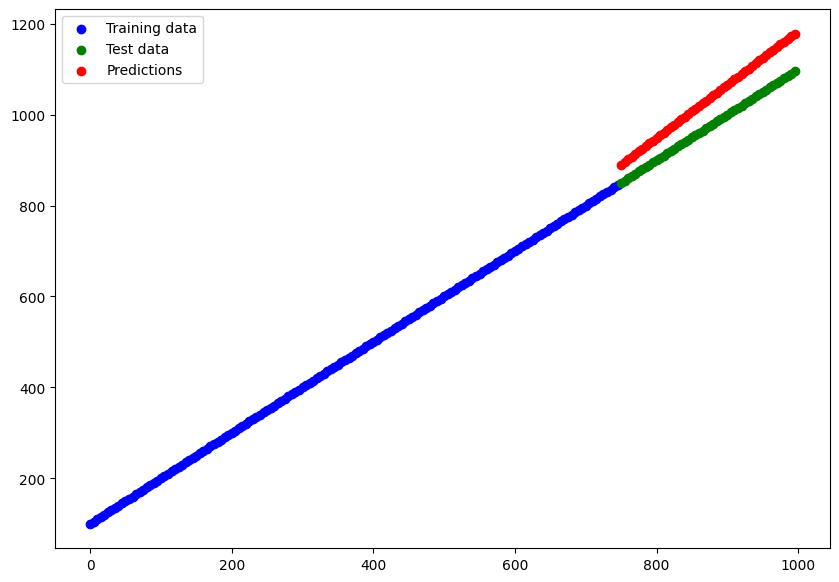

In [ ]:
# Make predictions with our trained data
y_reg_preds=model_3.predict(X_reg_test)

# Plot the model's prediction against our regression data
plt.figure(figsize=(10,7))
plt.scatter(X_reg_train,y_reg_train,c="b",label="Training data")
plt.scatter(X_reg_test,y_reg_test,c="g",label="Test data")
plt.scatter(X_reg_test,y_reg_preds,c="r",label="Predictions")
plt.legend();

# The missing piece : Non-linearity

In [ ]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_4=tf.keras.Sequential([
    tf.keras.layers.Dense(1,activation="linear")
])

# 2. Compile the model
model_4.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# 3. Fit the model
history=model_4.fit(X,y,epochs=100)

Epoch 1/100
32/32 [==============================] - 0s 2ms/step - loss: 4.2850 - accuracy: 0.4360
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 4.2271 - accuracy: 0.4410
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 4.1856 - accuracy: 0.4510
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 4.1614 - accuracy: 0.4580
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 4.1586 - accuracy: 0.4580
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 4.1378 - accuracy: 0.4580
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 4.0677 - accuracy: 0.4560
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 3.9911 - accuracy: 0.4540
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 3.9444 - accuracy: 0.4550
Epoch 10/100
32/32 [==============================] - 0s 1ms/step - loss: 3.9122 - accuracy: 0.4560
Epoch 11/

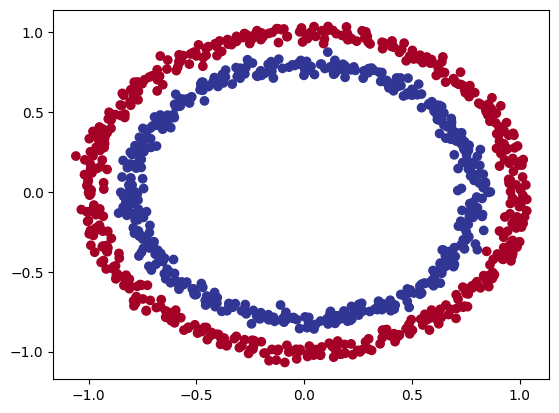

In [ ]:
# Check out our data
plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.RdYlBu)

313/313 [==============================] - 0s 1ms/step
doing binary classifcation...


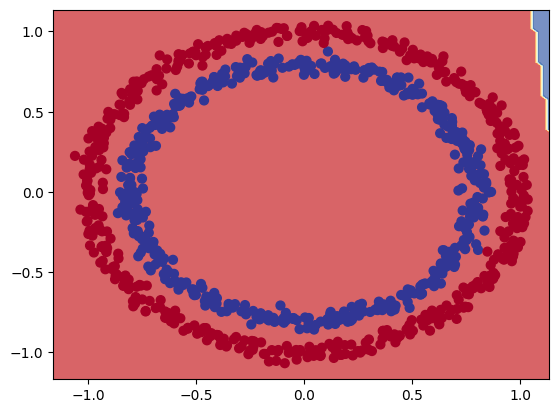

In [ ]:
# Check the decision boundary for our latest model
plot_decision_boundary(model=model_4,X=X,y=y)

Let's try build our first neural networks with a non-linear activation function.

In [ ]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create a model with a non-linear activation
model_5=tf.keras.Sequential([
    tf.keras.layers.Dense(1,activation="relu")
])

# 2. Compile the model
model_5.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# 3. Fit the model
history=model_5.fit(X,y,epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 5.7978 - accuracy: 0.4870
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 5.7716 - accuracy: 0.4860
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 5.7581 - accuracy: 0.4860
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 5.7404 - accuracy: 0.4860
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 5.7292 - accuracy: 0.4880
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 5.7255 - accuracy: 0.4870
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 5.7151 - accuracy: 0.4870
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 5.6911 - accuracy: 0.4880
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 5.6268 - accuracy: 0.4860
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 5.6033 - accuracy: 0.4850
Epoch 11/

In [ ]:
# Increasing the number of hidden layers
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_6=tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_6.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])

# 3. Fit the model
history=model_6.fit(X,y,epochs=250)

Epoch 1/250
32/32 [==============================] - 1s 2ms/step - loss: 2.8771 - accuracy: 0.5000
Epoch 2/250
32/32 [==============================] - 0s 2ms/step - loss: 1.6875 - accuracy: 0.5000
Epoch 3/250
32/32 [==============================] - 0s 2ms/step - loss: 1.4992 - accuracy: 0.5000
Epoch 4/250
32/32 [==============================] - 0s 2ms/step - loss: 1.4124 - accuracy: 0.5000
Epoch 5/250
32/32 [==============================] - 0s 2ms/step - loss: 1.3399 - accuracy: 0.5000
Epoch 6/250
32/32 [==============================] - 0s 2ms/step - loss: 1.2728 - accuracy: 0.5000
Epoch 7/250
32/32 [==============================] - 0s 2ms/step - loss: 1.2094 - accuracy: 0.5000
Epoch 8/250
32/32 [==============================] - 0s 2ms/step - loss: 1.1440 - accuracy: 0.4750
Epoch 9/250
32/32 [==============================] - 0s 2ms/step - loss: 1.0760 - accuracy: 0.4570
Epoch 10/250
32/32 [==============================] - 0s 2ms/step - loss: 0.9720 - accuracy: 0.4750
Epoch 11/

In [ ]:
# Evaluate our model
model_6.evaluate(X,y)

32/32 [==============================] - 0s 3ms/step - loss: 0.0701 - accuracy: 0.9810


[0.07010892778635025, 0.9810000061988831]

313/313 [==============================] - 1s 2ms/step
doing binary classifcation...


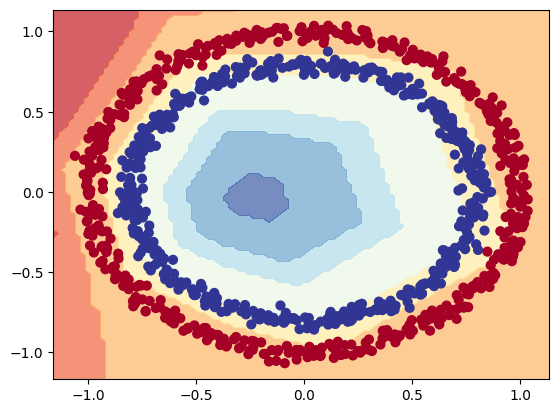

In [ ]:
# How does our model look?
plot_decision_boundary(model_6,X,y)

In [ ]:
# Changing the activation function for the output layer
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_7=tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

# 2. Compile the model
model_7.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])

# 3. Fit the model
history=model_7.fit(X,y,epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 0.7182 - accuracy: 0.4860
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7102 - accuracy: 0.4910
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7053 - accuracy: 0.4950
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7024 - accuracy: 0.4950
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7003 - accuracy: 0.4940
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6987 - accuracy: 0.4950
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6968 - accuracy: 0.4950
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6956 - accuracy: 0.4880
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6941 - accuracy: 0.4980
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6930 - accuracy: 0.4950
Epoch 11/

In [ ]:
# 4. Evaluate our model
model_7.evaluate(X,y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6306 - accuracy: 0.6160


[0.6306493282318115, 0.6159999966621399]

313/313 [==============================] - 0s 1ms/step
doing binary classifcation...


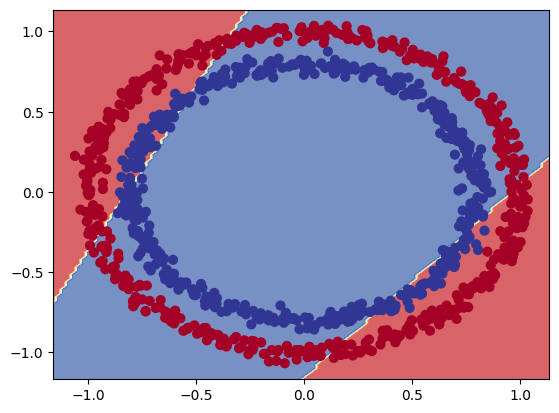

In [ ]:
# Let's visualize our predicitions
plot_decision_boundary(model_7,X,y)

In [ ]:
# Increasing the number of epochs
model_7.fit(X,y,epochs=100)

Epoch 1/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6306 - accuracy: 0.6120
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6302 - accuracy: 0.6160
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6292 - accuracy: 0.6120
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6287 - accuracy: 0.6140
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6282 - accuracy: 0.6160
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6278 - accuracy: 0.6090
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6268 - accuracy: 0.6160
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6265 - accuracy: 0.6180
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6258 - accuracy: 0.6200
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6251 - accuracy: 0.6160
Epoch 11/

313/313 [==============================] - 0s 1ms/step
doing binary classifcation...


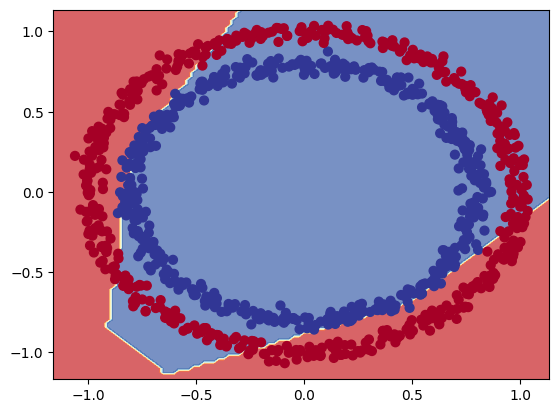

In [ ]:
# Visualizing our model
plot_decision_boundary(model_7,X,y)

🔑**Note:** The combination of **linear (straight lines) and non-linear functions** is one of the key fundamentals of neural networks

Now we've discussed the concept of linear and non-linear functions (or lines), let's see them in action

In [ ]:
# Create a toy tensor (similar to the data we pass into our models)
A=tf.cast(tf.range(-10,10), tf.float32)
A


<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

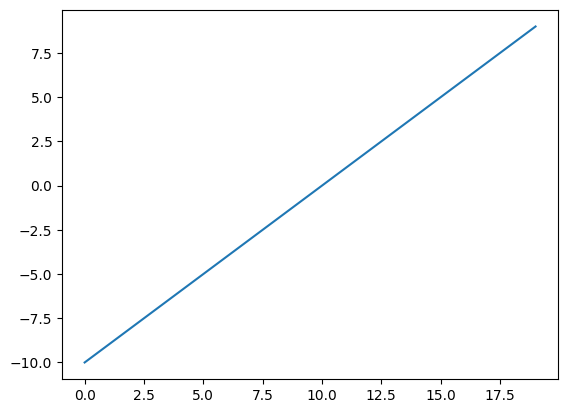

In [ ]:
# Visualize our toy tensor
plt.plot(A)

In [ ]:
# Let's start by replicating sigmoid - sigmoid(x) = 1/(1+exp(-x))
def sigmoid(x):
  return 1/(1+tf.exp(-x))

# Use the sigmoid function on our toy tensor
sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

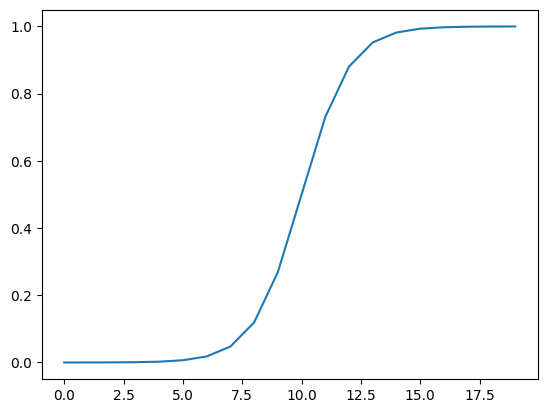

In [ ]:
# Plot our toy tensor transformed by sigmoid
plt.plot(sigmoid(A))

In [ ]:
# Let's recreate the relu function
def relu(x):
  return tf.maximum(0,x)

# Pass our toy tensor to our custom relu function
relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

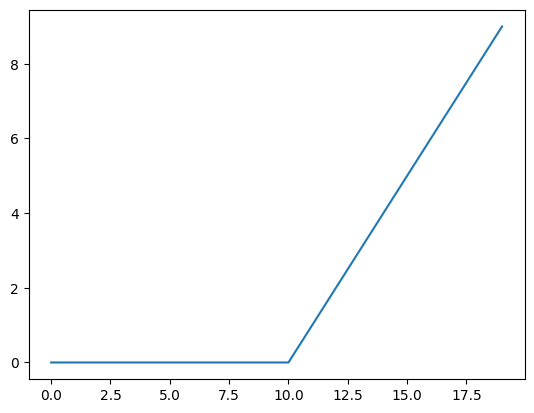

In [ ]:
# Plot ReLU-modified tensor
plt.plot(relu(A))

In [ ]:
# Let's try the linear activation function
tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

In [ ]:
# Does the linear activation change anything?
A == tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])>

# Evaluating and Improving our Classification Model

So far we've been training and testing on the same dataset... However, in machine learning this is basically a sin.

So let's create a training and testing data set

In [ ]:
# Check how many examples we have
len(X)

1000

In [ ]:
# Split into train and test sets
X_train,y_train=X[:800],y[:800]
X_test,y_test=X[800:],y[800:]

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 2), (200, 2), (800,), (200,))

In [ ]:
# Let's recreate a model to fit on the training data and evaluate on the testing data

# Set random seed
tf.random.set_seed(42)

# 1. Create a model
model_8=tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid"),
])

# 2. Compile the model
model_8.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(lr=0.01),
                metrics=["accuracy"])

# 3. Fit the model
history=model_8.fit(X_train,y_train,epochs=200)

Epoch 1/200
25/25 [==============================] - 1s 3ms/step - loss: 0.6971 - accuracy: 0.5100
Epoch 2/200
25/25 [==============================] - 0s 3ms/step - loss: 0.6926 - accuracy: 0.5050
Epoch 3/200
25/25 [==============================] - 0s 3ms/step - loss: 0.6897 - accuracy: 0.5150
Epoch 4/200
25/25 [==============================] - 0s 2ms/step - loss: 0.6878 - accuracy: 0.5125
Epoch 5/200
25/25 [==============================] - 0s 2ms/step - loss: 0.6864 - accuracy: 0.5125
Epoch 6/200
25/25 [==============================] - 0s 2ms/step - loss: 0.6851 - accuracy: 0.5125
Epoch 7/200
25/25 [==============================] - 0s 3ms/step - loss: 0.6840 - accuracy: 0.5050
Epoch 8/200
25/25 [==============================] - 0s 2ms/step - loss: 0.6832 - accuracy: 0.5113
Epoch 9/200
25/25 [==============================] - 0s 2ms/step - loss: 0.6824 - accuracy: 0.5113
Epoch 10/200
25/25 [==============================] - 0s 2ms/step - loss: 0.6817 - accuracy: 0.5138
Epoch 11/

In [ ]:
# 4. Evaluate the model on the test dataset
model_8.evaluate(X_test,y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.0935 - accuracy: 0.9950


[0.09354989975690842, 0.9950000047683716]

313/313 [==============================] - 0s 1ms/step
doing binary classifcation...
313/313 [==============================] - 0s 1ms/step
doing binary classifcation...


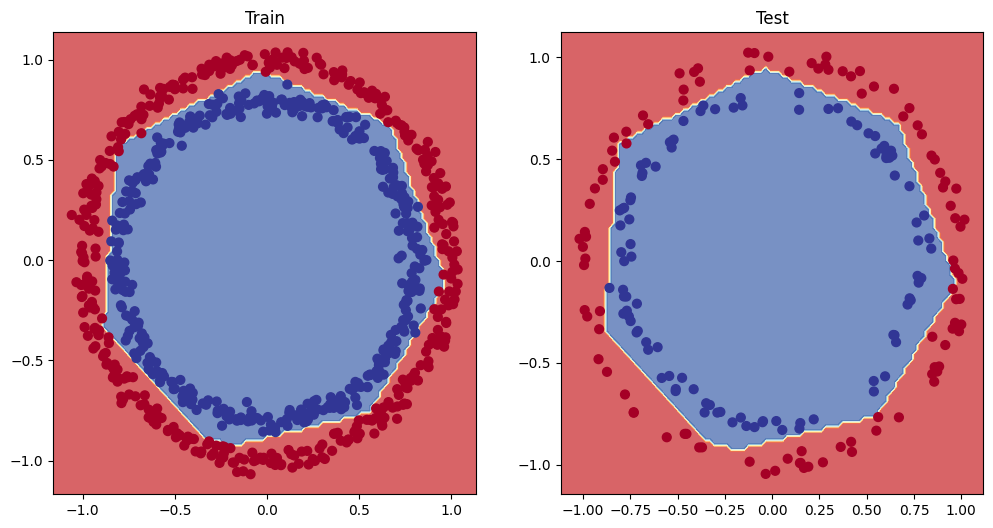

In [ ]:
# Plot the decision boundary for model_8
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_8,X_train,y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_8,X_test,y_test)

# Plot the loss (or training) curves

In [ ]:
history.history

{'loss': [0.6971201300621033,
  0.6925815343856812,
  0.6897015571594238,
  0.6877533197402954,
  0.6863744258880615,
  0.6850785613059998,
  0.684049665927887,
  0.6831823587417603,
  0.6824321746826172,
  0.6817107200622559,
  0.6810581684112549,
  0.6804602146148682,
  0.679638683795929,
  0.6789734363555908,
  0.6784096360206604,
  0.6776024699211121,
  0.6769856810569763,
  0.6762261986732483,
  0.6755900382995605,
  0.6747524738311768,
  0.6739168763160706,
  0.6731323003768921,
  0.6723337769508362,
  0.6714523434638977,
  0.670548677444458,
  0.6697031259536743,
  0.6688196063041687,
  0.6675825715065002,
  0.6667418479919434,
  0.6655516624450684,
  0.6644485592842102,
  0.663307249546051,
  0.6620531678199768,
  0.6608060598373413,
  0.6597237586975098,
  0.6582021117210388,
  0.6568349599838257,
  0.6557519435882568,
  0.6540423035621643,
  0.6527575850486755,
  0.6510623693466187,
  0.6491984724998474,
  0.6476582884788513,
  0.6458557844161987,
  0.6440485119819641,
  0.64

In [ ]:
# Convert the history object into a DataFrame
pd.DataFrame(history.history)

,loss,accuracy
0,0.697120,0.51000
1,0.692582,0.50500
2,0.689702,0.51500
3,0.687753,0.51250
4,0.686374,0.51250
...,...,...
195,0.092582,0.99500
196,0.091828,0.99375
197,0.091437,0.99500
198,0.090184,0.99500


Text(0.5, 1.0, 'Model_8 loss curves')

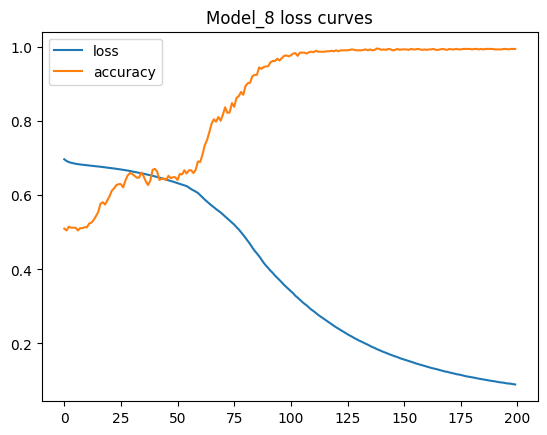

In [ ]:
# Plot the loss curves
pd.DataFrame(history.history).plot()
plt.title("Model_8 loss curves")

**🔑Note:** For many problems, the loss function going down means the model is improving(the prediction it's making are getting closer to the ground truth labels).


## Finding the best learning rate

To find the ideal learning rate (the learning rate wherenthe loss decreases the most during training) we're going to use the following steps:
* A learning rate **callback** - you can think of a callback as an extra piece of functionality, you can add to your model *while* its training
* Another model (we could use the same one as above, but we're practicing building models here)
* A modified loss curves plot

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model (same as model_8)
model_9=tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid"),
])

# 2. Compile the model
model_9.compile(loss="binary_crossentropy",
                optimizer="Adam",
                metrics=["accuracy"])

# Create a learning rate callback
lr_scheduler=tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

# 3. Fit the model (passing lr_scheduler callback)
history_9=model_9.fit(X_train,
                      y_train,
                      epochs=100,
                      callbacks=[lr_scheduler])

Epoch 1/100
25/25 [==============================] - 1s 2ms/step - loss: 0.7178 - accuracy: 0.5000 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7157 - accuracy: 0.4988 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7134 - accuracy: 0.5050 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7111 - accuracy: 0.5075 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7088 - accuracy: 0.5063 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7062 - accuracy: 0.5088 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7038 - accuracy: 0.5088 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7012 - accuracy: 0.5100 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 3ms/step - loss:

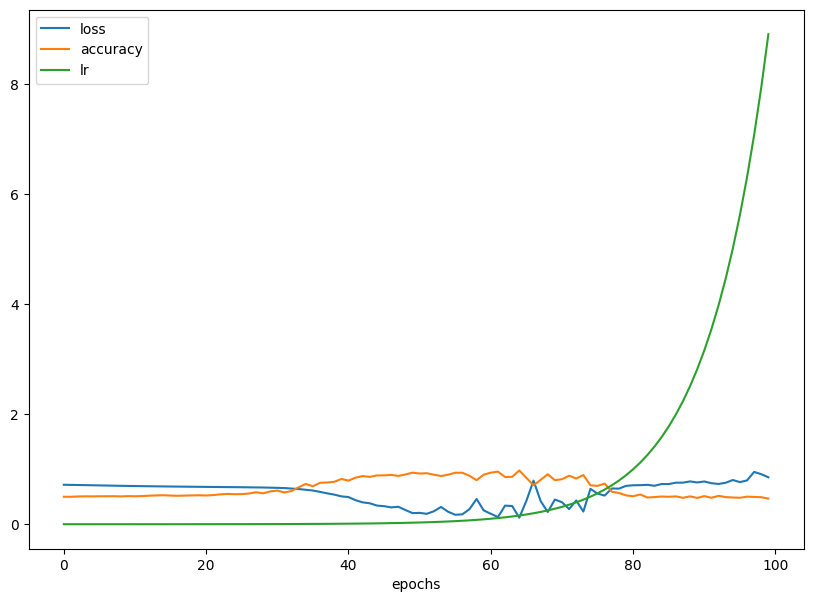

In [ ]:
# Checkout the history
pd.DataFrame(history_9.history).plot(figsize=(10,7),xlabel="epochs");

Text(0.5, 1.0, 'Learning rate vs Loss')

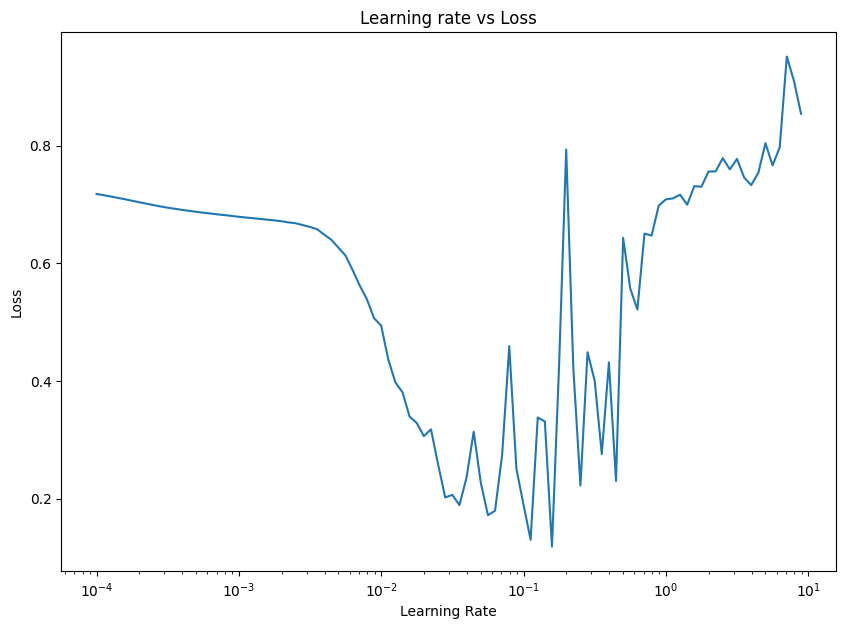

In [ ]:
# Plot the learning rate versus the loss
lrs= 1e-4 * (10**(tf.range(100)/20))
plt.figure(figsize=(10,7))
plt.semilogx(lrs,history_9.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning rate vs Loss")

In [ ]:
# Let's try using a higher *ideal* learning rate with the same model

# Set random seed
tf.random.set_seed(42)

# Create the model
model_10=tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid"),
])

# Compiling the model
model_10.compile(loss="binary_crossentropy",
                 optimizer=tf.keras.optimizers.Adam(lr=0.02),
                 metrics=["accuracy"])

# Fit the model
model_10.fit(X_train,y_train,epochs=200)

Epoch 1/200
25/25 [==============================] - 1s 2ms/step - loss: 0.7776 - accuracy: 0.4913
Epoch 2/200
25/25 [==============================] - 0s 2ms/step - loss: 0.7540 - accuracy: 0.4850
Epoch 3/200
25/25 [==============================] - 0s 2ms/step - loss: 0.7394 - accuracy: 0.4775
Epoch 4/200
25/25 [==============================] - 0s 2ms/step - loss: 0.7291 - accuracy: 0.4712
Epoch 5/200
25/25 [==============================] - 0s 2ms/step - loss: 0.7229 - accuracy: 0.4650
Epoch 6/200
25/25 [==============================] - 0s 2ms/step - loss: 0.7183 - accuracy: 0.4387
Epoch 7/200
25/25 [==============================] - 0s 2ms/step - loss: 0.7147 - accuracy: 0.4238
Epoch 8/200
25/25 [==============================] - 0s 2ms/step - loss: 0.7121 - accuracy: 0.4100
Epoch 9/200
25/25 [==============================] - 0s 2ms/step - loss: 0.7100 - accuracy: 0.4238
Epoch 10/200
25/25 [==============================] - 0s 2ms/step - loss: 0.7084 - accuracy: 0.4563
Epoch 11/

In [ ]:
model_10.fit(X_train,y_train,epochs=50)

Epoch 1/50
25/25 [==============================] - 0s 2ms/step - loss: 0.6932 - accuracy: 0.5013
Epoch 2/50
25/25 [==============================] - 0s 2ms/step - loss: 0.6932 - accuracy: 0.5013
Epoch 3/50
25/25 [==============================] - 0s 2ms/step - loss: 0.6932 - accuracy: 0.5013
Epoch 4/50
25/25 [==============================] - 0s 2ms/step - loss: 0.6932 - accuracy: 0.5013
Epoch 5/50
25/25 [==============================] - 0s 2ms/step - loss: 0.6932 - accuracy: 0.5013
Epoch 6/50
25/25 [==============================] - 0s 2ms/step - loss: 0.6932 - accuracy: 0.5013
Epoch 7/50
25/25 [==============================] - 0s 2ms/step - loss: 0.6932 - accuracy: 0.5013
Epoch 8/50
25/25 [==============================] - 0s 2ms/step - loss: 0.6932 - accuracy: 0.5013
Epoch 9/50
25/25 [==============================] - 0s 2ms/step - loss: 0.6932 - accuracy: 0.5013
Epoch 10/50
25/25 [==============================] - 0s 2ms/step - loss: 0.6932 - accuracy: 0.5013
Epoch 11/50
25/25 [

In [ ]:
model_10.fit(X_train,y_train,epochs=100)

Epoch 1/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6932 - accuracy: 0.5013
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6932 - accuracy: 0.5013
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6932 - accuracy: 0.5013
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6932 - accuracy: 0.5013
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6932 - accuracy: 0.5013
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6932 - accuracy: 0.5013
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6931 - accuracy: 0.5013
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6932 - accuracy: 0.5013
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6932 - accuracy: 0.5013
Epoch 10/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6932 - accuracy: 0.5013
Epoch 11/

In [ ]:
# Evaluate model 10 on the test dataset
model_10.evaluate(X_test,y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.6932 - accuracy: 0.4950


[0.6931700110435486, 0.4950000047683716]

313/313 [==============================] - 0s 1ms/step
doing binary classifcation...
313/313 [==============================] - 0s 1ms/step
doing binary classifcation...


Text(0.5, 1.0, 'Testing data')

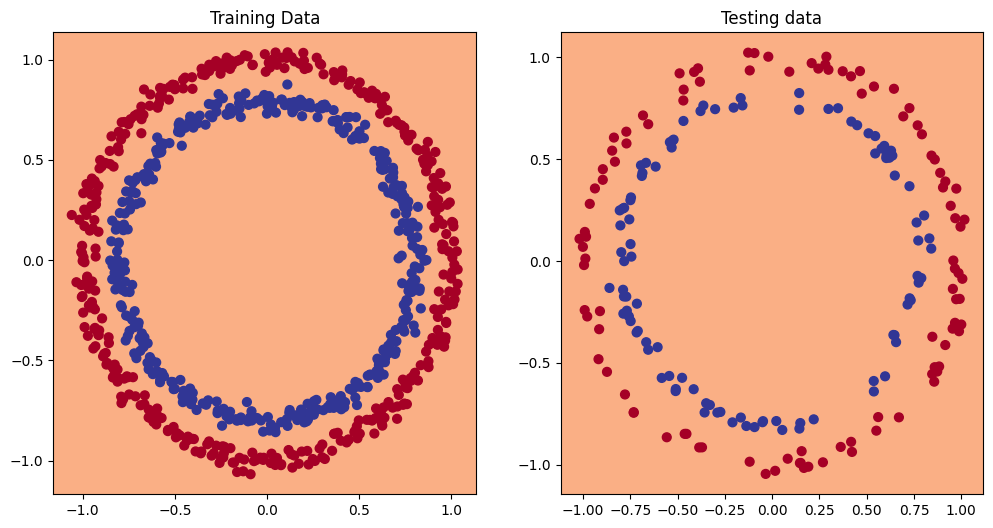

In [ ]:
# Visualizing the predictions
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plot_decision_boundary(model_10,X_train,y_train)
plt.title("Training Data")
plt.subplot(1,2,2)
plot_decision_boundary(model_10,X_test,y_test)
plt.title("Testing data")

## More classification evaluation methods

Alongside visualizing our models result as much as possible, there are a handful of other classification evaluation methods & metrics you should be familiar with :
* Accuracy
* Precision
* Recall
* F1-score
* Confusion matrix
* Classification report (from scikit-learn)

In [ ]:
# Check the accuracy of our model
loss, accuracy = model_10.evaluate(X_test,y_test)
print(f"Model loss on the test set: {loss}")
print(f"Model accuracy on the test set: {(accuracy*100):-2f}%")

7/7 [==============================] - 0s 2ms/step - loss: 0.6932 - accuracy: 0.4950
Model loss on the test set: 0.6931700110435486
Model accuracy on the test set: 49.500000%


How about a confusion matrix?


In [ ]:
# Create a confusion matrix
from sklearn.metrics import confusion_matrix

# Make predictions
y_preds=model_10.predict(X_test)

# Create confusion matrix
confusion_matrix(y_test,y_preds)

7/7 [==============================] - 0s 2ms/step


ValueError: ignored

In [ ]:
y_test[:10]

array([1, 1, 1, 1, 0, 0, 1, 0, 1, 0])

In [ ]:
y_preds[:10]

array([[0.50103635],
       [0.50103635],
       [0.50103635],
       [0.50103635],
       [0.50103635],
       [0.50103635],
       [0.50103635],
       [0.50103635],
       [0.50103635],
       [0.50103635]], dtype=float32)

Oops...looks like our prediction array has come out in **prediction probability** form (the standard output from the sigmoid (or softmax) activation functions.

In [ ]:
# Convert prediction probabilities to binary format and view the first 10 elements
tf.round(y_preds)[:10]

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]], dtype=float32)>

In [ ]:
# Create a confusion matrix
confusion_matrix(y_test,tf.round(y_preds))

array([[  0, 101],
       [  0,  99]])

How about we prettify our confusion matrix?



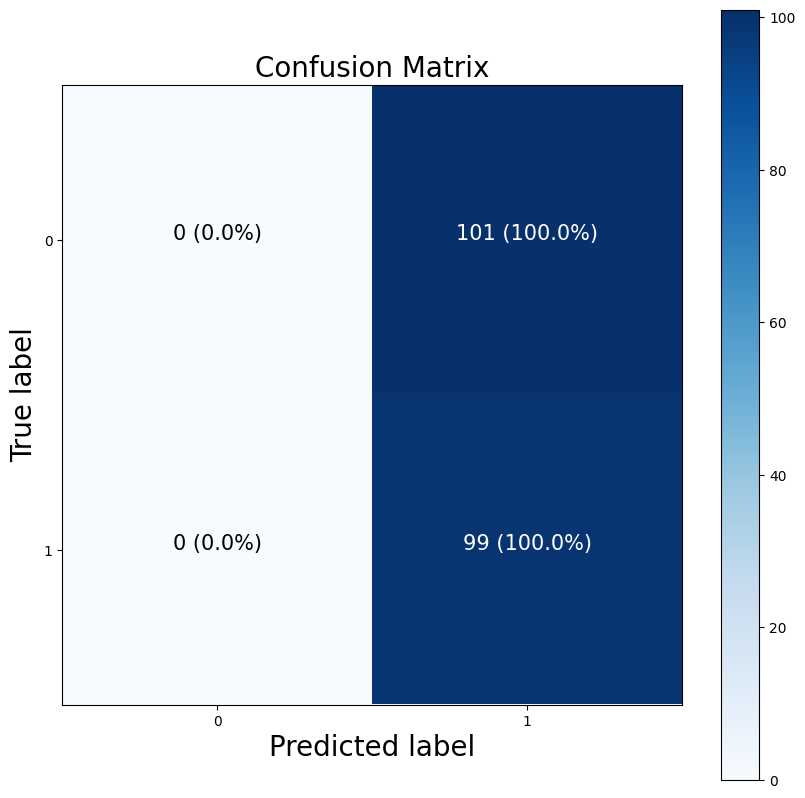

In [ ]:
# Note: The confusion matrix code we're about to write is a remix of scikit-learn's plot_confusion_matrix

import itertools

figsize=(10,10)

# Create the confusion matrix
cm=confusion_matrix(y_test,tf.round(y_preds))
cm_norm=cm.astype("float")/cm.sum(axis=1)[:,np.newaxis] # Normalize our confusion matrix
n_classes=cm.shape[0]

# Let's prettify it
fig,ax=plt.subplots(figsize=figsize)
# Create a matrix plot
cax=ax.matshow(cm,cmap=plt.cm.Blues)
fig.colorbar(cax)

# Create classes
classes=False

if classes:
  labels=classes
else:
  labels=np.arange(cm.shape[0])

# Label the axes
ax.set(title="Confusion Matrix",
       xlabel="Predicted label",
       ylabel="True label",
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels)

# Set x-axis labels to bottom
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

# Adjust label size
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)
ax.title.set_size(20)

# Set threshold for different colors
threshold = (cm.max() + cm.min()) / 2.

# Plot the text on each cell
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
           horizontalalignment="center",
           color="white" if cm[i, j] > threshold else "black",
           size=15)

# Working with a larger example (multiclass classification)

When you have more than two classes as an option, it's known as **multi-class classification**.

To practice multi-class classification, we're going to build a neural network to classify different images of different items of clothing

In [ ]:
from tensorflow.keras.datasets import fashion_mnist

# The data has already been sorted into training and test sets for us
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [ ]:
# Show the first training eample
print(f"Training sample:\n{train_data[0]}\n")
print(f"Training label:\n{train_labels[0]}\n")

Training sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

In [ ]:
# Check the shape of a single example
train_data[0].shape, train_labels[0].shape

((28, 28), ())

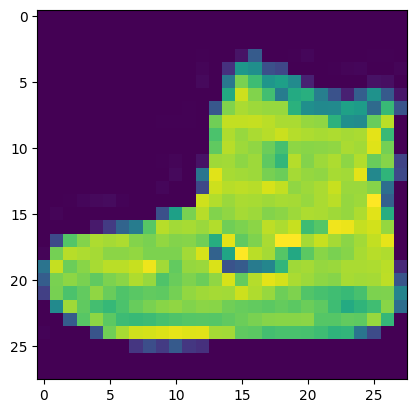

In [ ]:
# Plot a single sample
plt.imshow(train_data[0]);

In [ ]:
# Create a small list so we can index onto our training labels so they're human-readable
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# How many classes are there (this'll be our output shape)?
len(class_names)


10

Text(0.5, 1.0, 'T-shirt/top')

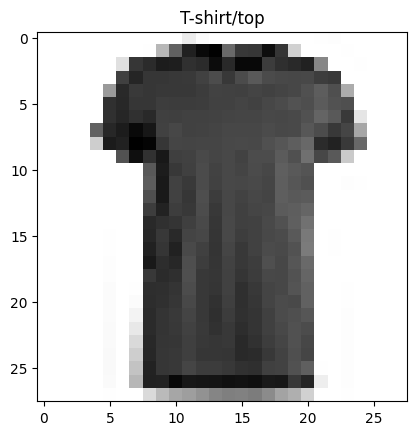

In [ ]:
# Plot an example image and its label
plt.imshow(train_data[17],cmap=plt.cm.binary)
plt.title(class_names[train_labels[17]])

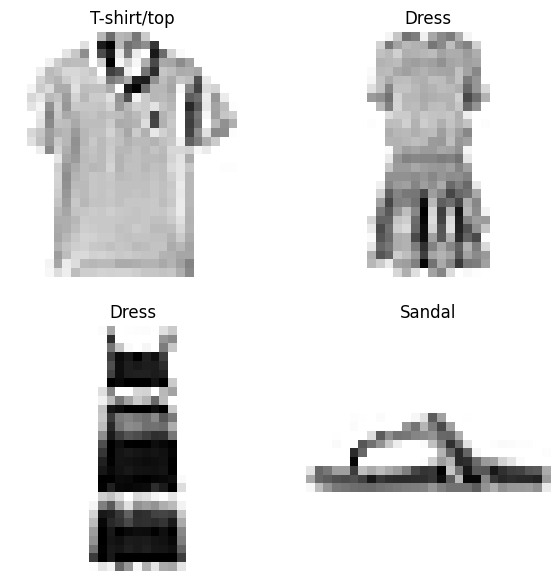

In [ ]:
# Plot multiple random images of fashion MNIST
import random
plt.figure(figsize=(7, 7))
for i in range(4):
  ax = plt.subplot(2, 2, i + 1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)

# Building a multi-class classification model

For our multi-class classification model, we can use a similar architecture to our binary classifiers, however, we're going to have to tweak a few things:
* Input shape = 28x28 (the shape of one image)
* Output shape = 10 (one per class of clothing)
* Loss funtion = tf.keras.losses.CategoricalCrossentropy()
 * If you labels are one-hot encoded, use CategoricalCrossentropy()
 * If you labels are integers, use SparseCategoricalCrossentropy()
* Output layer activation = Softmax (not sigmoid)

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_11 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(10,activation="softmax")
])

# 2. Compile the model
model_11.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# 3. Fit the model
non_norm_history = model_11.fit(train_data,
                                train_labels,
                                epochs=10,
                                validation_data=(test_data,test_labels))

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 2.1698 - accuracy: 0.1812 - val_loss: 1.9116 - val_accuracy: 0.1999
Epoch 2/10
1875/1875 [==============================] - 5s 2ms/step - loss: 1.8442 - accuracy: 0.1961 - val_loss: 1.7996 - val_accuracy: 0.1995
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.7974 - accuracy: 0.2005 - val_loss: 1.7685 - val_accuracy: 0.1995
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.7573 - accuracy: 0.1960 - val_loss: 1.7549 - val_accuracy: 0.2003
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.7432 - accuracy: 0.1980 - val_loss: 1.7288 - val_accuracy: 0.1998
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.7305 - accuracy: 0.1954 - val_loss: 1.7206 - val_accuracy: 0.2001
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.7332 - accuracy: 0.1962 - val_loss: 1.7460 - val_accuracy:

In [ ]:
# Check the model summary
model_11.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_26 (Dense)            (None, 4)                 3140      
                                                                 
 dense_27 (Dense)            (None, 4)                 20        
                                                                 
 dense_28 (Dense)            (None, 10)                50        
                                                                 
Total params: 3210 (12.54 KB)
Trainable params: 3210 (12.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Check the min and max values of the training data
train_data.min(), train_data.max()

(0, 255)

Neural networks prefer data to be scaled (or normalized), this means they like to have the numbers in the range between 0 & 1


In [ ]:
# We can get our training and testing data between 0 & 1 by dividing by the maximum value
train_data_norm = train_data/255.0
test_data_norm = test_data/255.0

# Check the min and max values of the scaled training data
train_data_norm.min(), train_data_norm.max()


(0.0, 1.0)

In [ ]:
# Now our data is normalized, let's build a model to find patterns in it

# Set random seed
tf.random.set_seed(42)

# Create the model
model_12 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(10,activation="softmax")
])

# 2. Compile the model
model_12.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# 3. Fit the model
norm_history = model_12.fit(train_data_norm,
                            train_labels,
                            epochs=10,
                            validation_data=(test_data_norm,test_labels))

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.1164 - accuracy: 0.5890 - val_loss: 0.8038 - val_accuracy: 0.7292
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7318 - accuracy: 0.7557 - val_loss: 0.7334 - val_accuracy: 0.7535
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6688 - accuracy: 0.7748 - val_loss: 0.6847 - val_accuracy: 0.7597
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6378 - accuracy: 0.7843 - val_loss: 0.6540 - val_accuracy: 0.7743
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6219 - accuracy: 0.7854 - val_loss: 0.6517 - val_accuracy: 0.7753
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6101 - accuracy: 0.7882 - val_loss: 0.6663 - val_accuracy: 0.7634
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5979 - accuracy: 0.7924 - val_loss: 0.6646 - val_accuracy:

🔑**Note:** Neural networks tend to prefer data in numerical form as well as scaled/normalized (numbers between 0 & 1)


<Axes: title={'center': 'Normalized data'}>

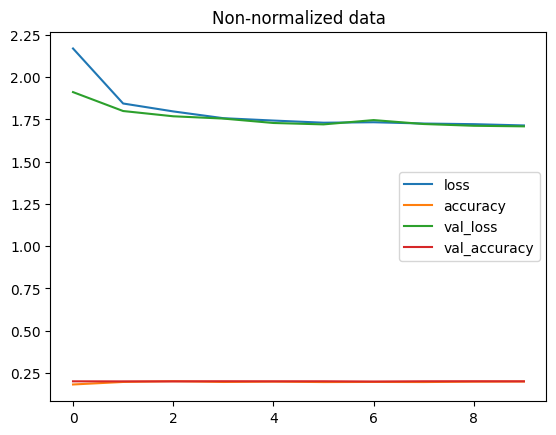

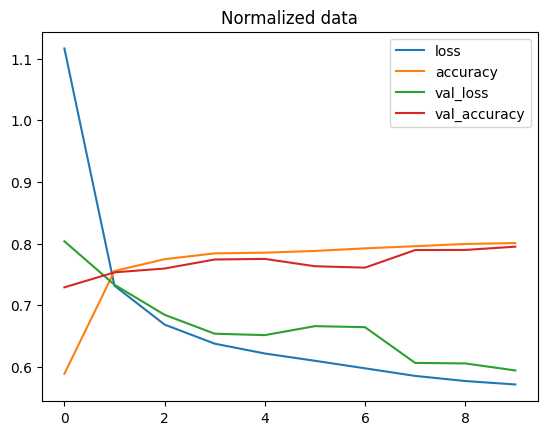

In [ ]:
# Plot non-normalized data loss curves
pd.DataFrame(non_norm_history.history).plot(title="Non-normalized data")
# Plot normalized data loss curves
pd.DataFrame(norm_history.history).plot(title="Normalized data")


🔑**Note:** The same model with even slighlty different data can produce dramatically different results. So when you're comparing models, it's important to make sure you're comparing on the same criteria (e.g. same architecture but different data or same data with different architecture).


## Finding the ideal learning rate


In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_13 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(10,activation="softmax")
])

# 2. Compile the model
model_13.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Create the learning rate callback
lr_scheduler=tf.keras.callbacks.LearningRateScheduler(lambda epoch : 1e-3 * 10**(epoch/20))

# 3. Fit the model
find_lr_history = model_12.fit(train_data_norm,
                            train_labels,
                            epochs=40,
                            validation_data=(test_data_norm,test_labels),
                            callbacks=[lr_scheduler])

Epoch 1/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5656 - accuracy: 0.8022 - val_loss: 0.5944 - val_accuracy: 0.7952 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5620 - accuracy: 0.8040 - val_loss: 0.5988 - val_accuracy: 0.7912 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5586 - accuracy: 0.8046 - val_loss: 0.5999 - val_accuracy: 0.7847 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5583 - accuracy: 0.8067 - val_loss: 0.6057 - val_accuracy: 0.7861 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5582 - accuracy: 0.8044 - val_loss: 0.5954 - val_accuracy: 0.7969 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5570 - accuracy: 0.8051 - val_loss: 0.6275 - val_accuracy: 0.7791 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 4s

Text(0.5, 1.0, 'Finding the ideal learning rate')

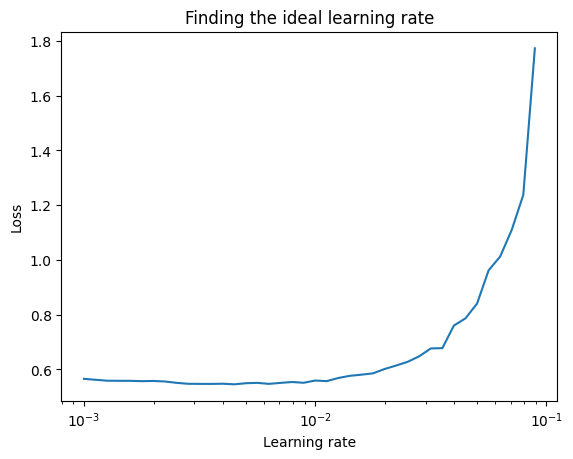

In [ ]:
# Plot the learning rate decay curve
lrs= 1e-3 * (10**(np.arange(40)/20))
plt.semilogx(lrs,find_lr_history.history["loss"])
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate")

The default parameter (0.001) is the ideal learning rate in this case

In [ ]:
# Refitting the model with ideal learning rate

# Set random seed
tf.random.set_seed(42)

# Create the model
model_14 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(10,activation="softmax")
])

# 2. Compile the model
model_14.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(lr=0.001),
                 metrics=["accuracy"])

# 3. Fit the model
history_14 = model_14.fit(train_data_norm,
                            train_labels,
                            epochs=20,
                            validation_data=(test_data_norm,test_labels))

Epoch 1/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.8700 - accuracy: 0.6750 - val_loss: 0.6944 - val_accuracy: 0.7522
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6412 - accuracy: 0.7726 - val_loss: 0.6573 - val_accuracy: 0.7725
Epoch 3/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5909 - accuracy: 0.7934 - val_loss: 0.6004 - val_accuracy: 0.7941
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5569 - accuracy: 0.8069 - val_loss: 0.5695 - val_accuracy: 0.8032
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5334 - accuracy: 0.8147 - val_loss: 0.5596 - val_accuracy: 0.8026
Epoch 6/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5167 - accuracy: 0.8199 - val_loss: 0.5545 - val_accuracy: 0.8042
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5080 - accuracy: 0.8228 - val_loss: 0.5498 - val_accuracy:

## Evaluating our multi-calss classification model
To evaluate our multi-class classification model we could:
* Evaluate its performancceusing other classification metrics (such as a confusion matrix)
* Assess some of its prediction (through visualizations)
* Improve its results (by training it for longer or changing the architecture)
* Save and export it for use in an application

In [ ]:
# Create a confusion matrix

import itertools

def make_confusion_matrix(y_true,y_pred,classes=None,figsize=(10,10),text_size=15):

  # Create the confusion matrix
  cm=confusion_matrix(y_true,y_pred)
  cm_norm=cm.astype("float")/cm.sum(axis=1)[:,np.newaxis] # Normalize our confusion matrix
  n_classes=cm.shape[0]

  # Let's prettify it
  fig,ax=plt.subplots(figsize=figsize)
  # Create a matrix plot
  cax=ax.matshow(cm,cmap=plt.cm.Blues)
  fig.colorbar(cax)

  # Set labels to be classes
  if classes:
    labels=classes
  else:
    labels=np.arange(cm.shape[0])

  # Label the axes
  ax.set(title="Confusion Matrix",
        xlabel="Predicted label",
        ylabel="True label",
        xticks=np.arange(n_classes),
        yticks=np.arange(n_classes),
        xticklabels=labels,
        yticklabels=labels)

  # Set x-axis labels to bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Adjust label size
  ax.xaxis.label.set_size(text_size)
  ax.yaxis.label.set_size(text_size)
  ax.title.set_size(text_size)

  # Set threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
            horizontalalignment="center",
            color="white" if cm[i, j] > threshold else "black",
            size=text_size)

In [ ]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [ ]:
# Make some predictions with our models
y_probs=model_14.predict(test_data_norm)

# View the first 5 predictions
y_probs[:5]

313/313 [==============================] - 0s 1ms/step


array([[8.8412824e-05, 3.8007462e-07, 7.2789055e-07, 2.3915246e-03,
        7.1662243e-06, 4.9745835e-02, 8.6056105e-05, 1.6380949e-01,
        2.1595997e-03, 7.8171074e-01],
       [8.4326568e-04, 7.4779479e-07, 7.4934620e-01, 2.9479663e-06,
        7.5861029e-02, 7.7727220e-33, 1.7394018e-01, 1.1381691e-25,
        5.5068067e-06, 4.8797629e-35],
       [2.8438483e-06, 9.9956614e-01, 3.6340332e-04, 4.7963222e-05,
        1.9256622e-05, 1.1227541e-30, 3.0753452e-07, 7.2275703e-29,
        3.8082385e-15, 4.6514334e-22],
       [3.2767757e-06, 9.9830198e-01, 8.8118068e-05, 1.5014347e-03,
        1.0475902e-04, 2.2171443e-24, 6.0775341e-07, 1.0156032e-21,
        1.2944339e-12, 2.3521246e-13],
       [1.7570609e-01, 7.0699345e-04, 1.7543304e-01, 3.0280011e-02,
        4.4341385e-02, 2.2175187e-15, 5.7192904e-01, 9.2707753e-13,
        1.6035312e-03, 4.2790426e-16]], dtype=float32)

🔑**Note:** Remember to make predictions on the same kind of data your model was trained on (e.g. if your model was trained on normalized data, you'll want to make predictions on normalized data)

In [ ]:
y_probs[0], class_names[tf.argmax(y_probs[0])]

(array([8.8412824e-05, 3.8007462e-07, 7.2789055e-07, 2.3915246e-03,
        7.1662243e-06, 4.9745835e-02, 8.6056105e-05, 1.6380949e-01,
        2.1595997e-03, 7.8171074e-01], dtype=float32),
 'Ankle boot')

In [ ]:
# Convert all the prediction probabilities into integers
y_preds=y_probs.argmax(axis=1)

# View the first 10 prediction labels
y_preds[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [ ]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [ ]:
confusion_matrix(test_labels,y_preds)

array([[735,   6,  26,  75,   2,   3, 138,   0,  15,   0],
       [  0, 951,  10,  34,   3,   0,   1,   0,   1,   0],
       [ 15,   8, 732,  11, 157,   1,  74,   0,   2,   0],
       [ 36,  16,  15, 828,  46,   1,  52,   0,   6,   0],
       [  1,   3, 135,  21, 773,   0,  63,   0,   4,   0],
       [  0,   0,   0,   1,   0, 911,   0,  46,  11,  31],
       [118,   2, 139,  50, 156,   1, 515,   0,  19,   0],
       [  0,   0,   0,   0,   0,  31,   0, 937,   3,  29],
       [  1,   1,   3,  12,   5,   3,  53,   4, 918,   0],
       [  0,   0,   0,   3,   0,  24,   0,  48,   1, 924]])

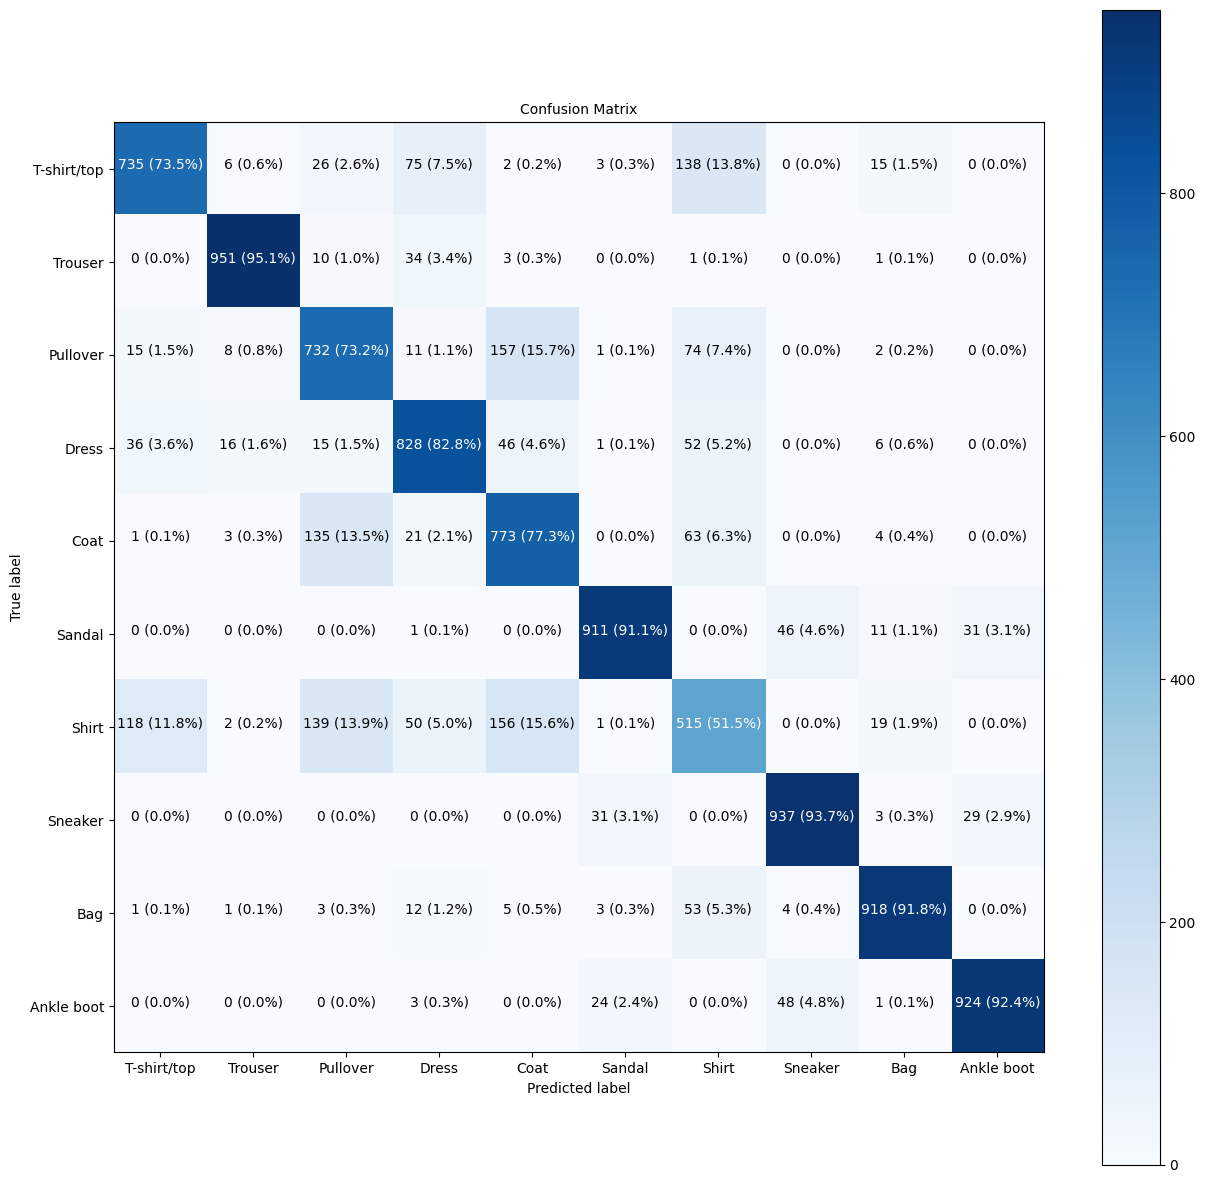

In [ ]:
# Make a prettier confusion matrix
make_confusion_matrix(y_true=test_labels,
                      y_pred=y_preds,
                      classes=class_names,
                      figsize=(15,15),
                      text_size=10)

🔑**Note: **Often when working with images and other forms of visual data, it's a good idea to visualize as much as possible to develop a further understanding of the data and the inputs and outputs of your models.

How about we create a function for:
* Plot a random image
* Make a prediction on said image
* Label the plot with the truth & predicted label

In [ ]:
import random

def plot_random_image(model, images, true_labels, classes):
  """
  Picks a random image, plots it and labels it with a prediction and truth label.
  """

  # Set up random integer
  i=random.randint(0,len(images))

  # Create predictions and targets
  target_image=images[i]
  pred_probs=model.predict(target_image.reshape(1,28,28))
  pred_label=classes[pred_probs.argmax()]
  true_label=classes[true_labels[i]]

  # Plot the image
  plt.imshow(target_image,cmap=plt.cm.binary)

  # Change the colour of the titles depending on if the prediction is right or wrong
  if pred_label==true_label:
    color="green"
  else:
    color="red"

  # Add xlabel information (prediction/true label)
  plt.xlabel("Pred: {} {:2.0f}% (True: {}))".format(pred_label,
                                                    100*tf.reduce_max(pred_probs),
                                                    true_label),
             color=color)

1/1 [==============================] - 0s 90ms/step


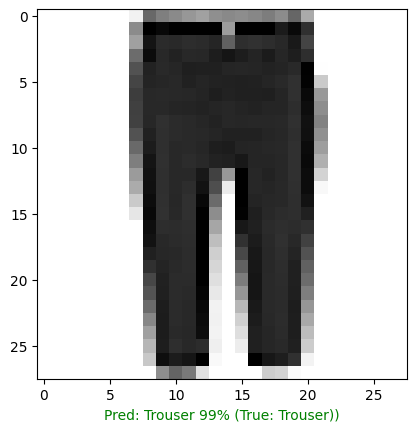

In [ ]:
# Check out a random image as well as its prediction
plot_random_image(model=model_14,
                  images=test_data_norm,
                  true_labels=test_labels,
                  classes=class_names)

# What patterns is our model learning?

In [ ]:
# Find the layers of our most recent model
model_14.layers

In [ ]:
# Etract a particular layer
model_14.layers[1]

In [ ]:
# Get the patterns of a layer in our network
weights, biases = model_14.layers[1].get_weights()

# Shapes
weights, weights.shape

(array([[ 0.11394846,  0.85901195, -0.5020848 ,  0.46019804],
        [-0.5519971 ,  0.89587086, -1.0499154 ,  1.1400911 ],
        [ 0.03148363,  0.66894954, -0.70234567, -0.48523378],
        ...,
        [-0.09416331, -0.34716475, -0.5051208 , -0.12824915],
        [-0.40439594, -1.1138998 , -0.4410865 ,  0.44462675],
        [-0.02663175, -0.29880905, -0.3858063 ,  0.31892607]],
       dtype=float32),
 (784, 4))

In [ ]:
model_14.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_35 (Dense)            (None, 4)                 3140      
                                                                 
 dense_36 (Dense)            (None, 4)                 20        
                                                                 
 dense_37 (Dense)            (None, 10)                50        
                                                                 
Total params: 3210 (12.54 KB)
Trainable params: 3210 (12.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Now let's check out the bias vector

In [ ]:
# Bias and biases shapes
biases, biases.shape

(array([0.74050593, 1.6885259 , 0.8671931 , 0.630468  ], dtype=float32), (4,))

Every neuron has a bias vector. Each of these is paired with a weigths matrix

The bias vector get intialized as zeros (at least in the case of a TensorFlow Desne Layer).

The bias vector dictates how much the patterns within the corresponding weights matrix should influence the next layer

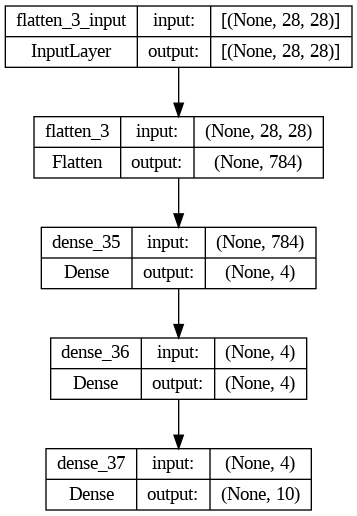

In [ ]:
# Let's check out another way of viewing our deep learning models
from tensorflow.keras.utils import plot_model

# See the inputs and outputs of each layer
plot_model(model_14, show_shapes=True)